# MNIST
### import

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


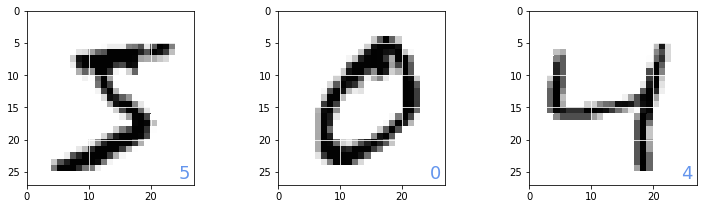

In [2]:
#-- リスト 8-1-(2)
plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    #img = x_train[id, :, :].reshape(28, 28)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

## 2 layer feed foward network model

In [3]:
#-- リスト 8-1-(3)

x_train = x_train.reshape(60000, 784)  # (A)
x_train = x_train.astype('float32')   # (B)
x_train = x_train / 255               # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
np.random.seed(1)
model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(), metrics=['accuracy'])

In [5]:
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.0610 - accuracy: 0.2891 - val_loss: 1.7855 - val_accuracy: 0.5009
Epoch 2/10
60000/60000 [==============================] - 0s 5us/step - loss: 1.6048 - accuracy: 0.6523 - val_loss: 1.4363 - val_accuracy: 0.7675
Epoch 3/10
60000/60000 [==============================] - 0s 5us/step - loss: 1.3184 - accuracy: 0.7885 - val_loss: 1.1974 - val_accuracy: 0.8202
Epoch 4/10
60000/60000 [==============================] - 0s 5us/step - loss: 1.1122 - accuracy: 0.8249 - val_loss: 1.0182 - val_accuracy: 0.8445
Epoch 5/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.9535 - accuracy: 0.8438 - val_loss: 0.8785 - val_accuracy: 0.8589
Epoch 6/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.8299 - accuracy: 0.8590 - val_loss: 0.7709 - val_accuracy: 0.8711
Epoch 7/10
60000/60000 [==============================] - 0s 5us/step - lo

KeyError: 'acc'

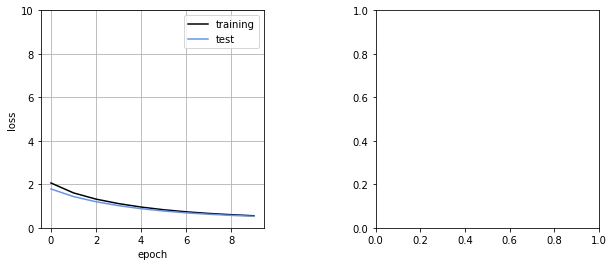

In [8]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
        color='cornflowerblue')
plt.ylim(0, 10) 
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()

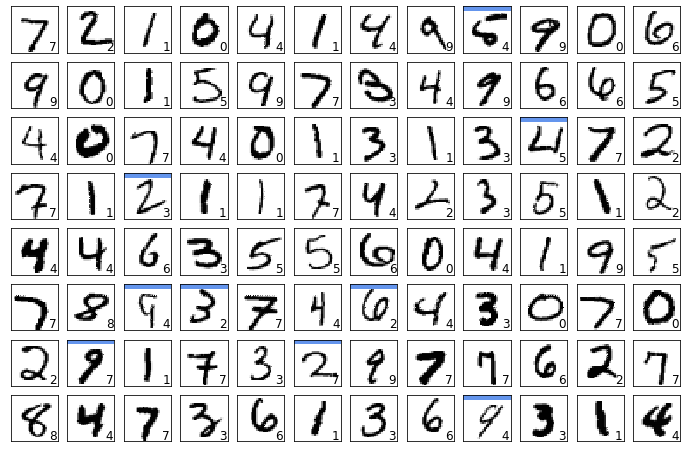

In [9]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()

## ReLU function

In [10]:
np.random.seed(1)
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                   verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.5010 - accuracy: 0.5620 - val_loss: 0.8034 - val_accuracy: 0.8292
Epoch 2/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.6133 - accuracy: 0.8560 - val_loss: 0.4679 - val_accuracy: 0.8841
Epoch 3/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.4308 - accuracy: 0.8878 - val_loss: 0.3758 - val_accuracy: 0.9028
Epoch 4/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.3643 - accuracy: 0.9007 - val_loss: 0.3329 - val_accuracy: 0.9105
Epoch 5/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.3291 - accuracy: 0.9082 - val_loss: 0.3069 - val_accuracy: 0.9158
Epoch 6/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.3060 - accuracy: 0.9143 - val_loss: 0.2903 - val_accuracy: 0.9187
Epoch 7/10
60000/60000 [==============================] - 0s 5us/step - lo

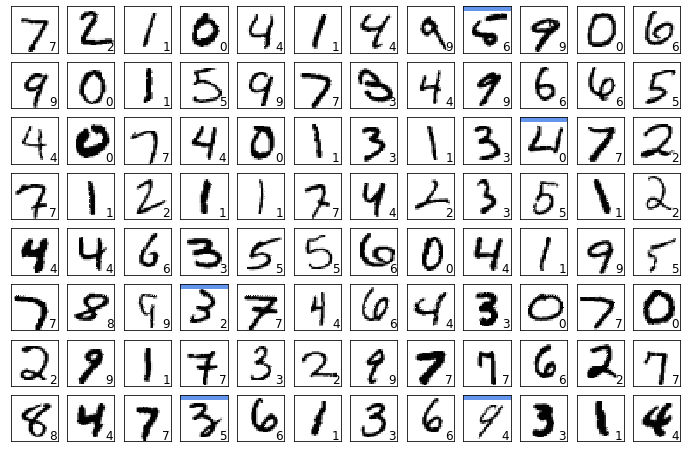

In [11]:
show_prediction()
plt.show()

### Show Weight

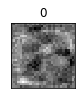

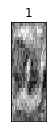

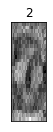

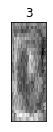

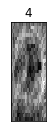

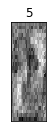

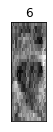

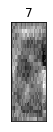

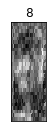

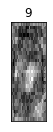

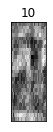

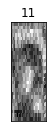

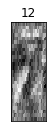

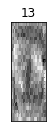

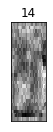

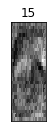

In [12]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.show()

## Convolution Neural Network

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

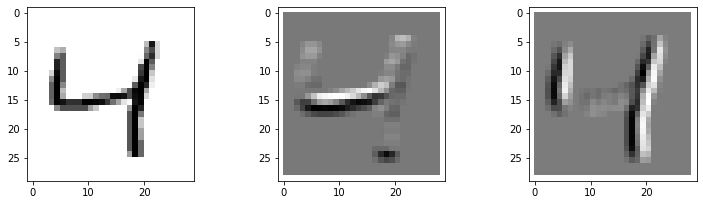

In [14]:
id_img = 2
myfil1 = np.array([[1, 1, 1],
                  [1, 1, 1],
                  [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2, 1, 1],
                  [-2, 1, 1],
                  [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))
        
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [15]:
np.random.seed(1)
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
           input_shape=(28, 28, 1), activation='relu'))  # (A)
model.add(Flatten())                                    # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.9090 - accuracy: 0.7888 - val_loss: 0.3639 - val_accuracy: 0.8993
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3228 - accuracy: 0.9087 - val_loss: 0.2703 - val_accuracy: 0.9246
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2550 - accuracy: 0.9284 - val_loss: 0.2228 - val_accuracy: 0.9362
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2111 - accuracy: 0.9412 - val_loss: 0.1887 - val_accuracy: 0.9476
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1765 - accuracy: 0.9508 - val_loss: 0.1631 - val_accuracy: 0.9553
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1513 - accuracy: 0.9581 - val_loss: 0.1395 - val_accuracy: 0.9623
Epoch 7/20
60000/60000 [==============================] - 3s 56us/st

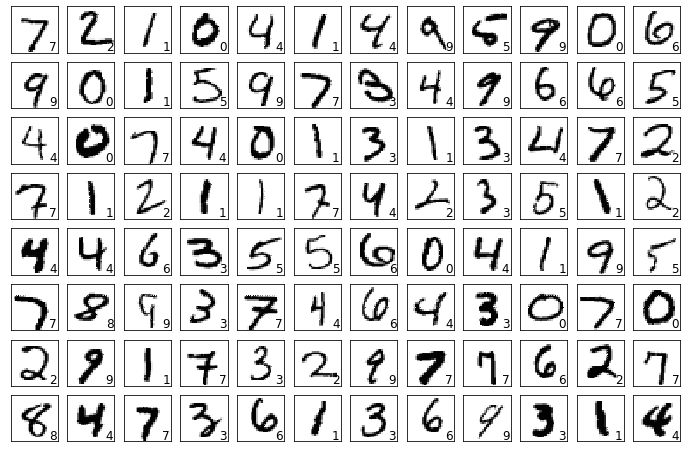

In [16]:
show_prediction()
plt.show()

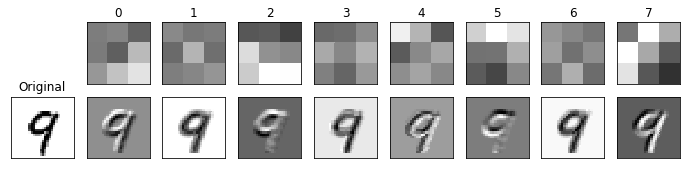

In [17]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## Final

In [18]:
np.random.seed(1)
model = Sequential()
model.add(Conv2D(16, (3, 3), 
                input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                  verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 399us/step - loss: 2.1709 - accuracy: 0.4173 - val_loss: 2.0504 - val_accuracy: 0.7021
Epoch 2/20
60000/60000 [==============================] - 23s 383us/step - loss: 2.0002 - accuracy: 0.5731 - val_loss: 1.9259 - val_accuracy: 0.7694
Epoch 3/20
60000/60000 [==============================] - 25s 421us/step - loss: 1.8798 - accuracy: 0.6334 - val_loss: 1.7990 - val_accuracy: 0.8462
Epoch 4/20
60000/60000 [==============================] - 23s 383us/step - loss: 1.7565 - accuracy: 0.6739 - val_loss: 1.6738 - val_accuracy: 0.8755
Epoch 5/20
60000/60000 [==============================] - 23s 384us/step - loss: 1.6481 - accuracy: 0.6844 - val_loss: 1.5691 - val_accuracy: 0.8810
Epoch 6/20
60000/60000 [==============================] - 24s 393us/step - loss: 1.5580 - accuracy: 0.6875 - val_loss: 1.4773 - val_accuracy: 0.8823
Epoch 7/20
60000/60000 [==============================] 

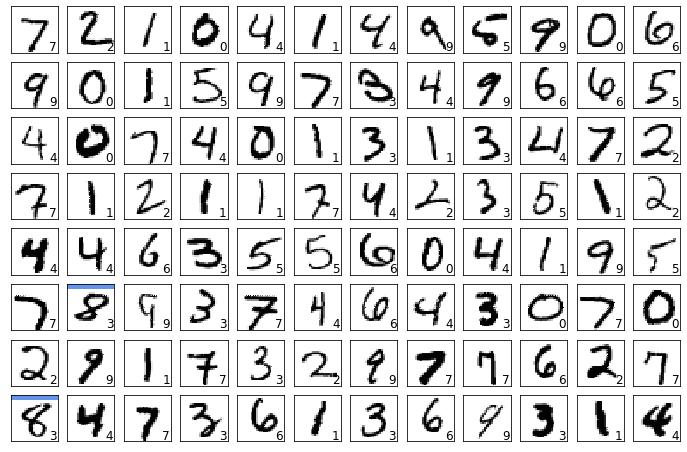

In [19]:
show_prediction()
plt.show()